In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

import copy

from sklearn import svm

%matplotlib inline

In [3]:
# import data
loc1 = r'C:\Users\c0w00f8.WMSC\Documents\Coursera\1. Machine Learning\machine-learning-ex6\ex6\ex6data1.mat'
data1 = loadmat(loc1)

In [8]:
data1_x = data1['X']
data1_y = data1['y']

In [26]:
data1_df = pd.DataFrame(np.concatenate((data1_x, data1_y), axis = 1))
data1_df.columns = ['x1', 'x2', 'y']
data1_df.head()

,x1,x2,y
0,1.9643,4.5957,1.0
1,2.2753,3.8589,1.0
2,2.9781,4.5651,1.0
3,2.9320,3.5519,1.0
4,3.5772,2.8560,1.0


In [9]:
loc2 = r'C:\Users\c0w00f8.WMSC\Documents\Coursera\1. Machine Learning\machine-learning-ex6\ex6\ex6data2.mat'
data2 = loadmat(loc2)

In [11]:
data2_x = data2['X']
data2_y = data2['y']

In [12]:
loc3 = r'C:\Users\c0w00f8.WMSC\Documents\Coursera\1. Machine Learning\machine-learning-ex6\ex6\ex6data3.mat'
data3 = loadmat(loc3)

In [15]:
data3_x = data3['X']
data3_y = data3['y']
data3_yval = data3['yval']
data3_xval = data3['Xval']

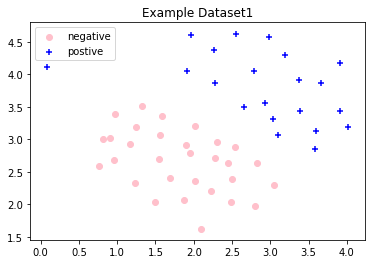

In [28]:
# plot data1
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
title = ax.set_title('Example Dataset1')
plot1 = ax.scatter(data1_df[data1_df.y == 0].x1, data1_df[data1_df.y == 0].x2, marker = 'o', c = 'pink',
                  label = 'negative')
plot2 = ax.scatter(data1_df[data1_df.y == 1].x1, data1_df[data1_df.y == 1].x2, marker = '+', c = 'blue',
                  label = 'postive')
ax.legend()
fig.canvas.draw()

In [76]:
# svm w/ different kernel options
def svmTrain(x, y, c, kernel, sigma=0.01):
    y = y.flatten()
    if kernel == 'linear':
        clf = svm.SVC(kernel=kernel, C=c)
        
    if kernel == 'gaussian':
        clf = svm.SVC(kernel='rbf', C=c, gamma=1/sigma**2/2)
    
    clf.fit(x, y)
    
    return clf

# for using gamma to realize Gaussian Kernel
# check http://scikit-learn.org/stable/modules/svm.html
# 1.4.6 Kernel functions
# rbf with gamma

In [45]:
# test C=1
test1 = svmTrain(data1_x, data1_y, 1, 'linear')
test1.coef_
#test1.intercept_

array([[1.40718563, 2.13398052]])

In [47]:
data1_x[:, 0].min()

0.086405

In [80]:
def visualizeBoundaryLinear(x, y, model):
    w = model.coef_
    b = model.intercept_
    xx = np.linspace(x[:, 0].min(), x[:, 0].max(), 50)
    yy = - (w[0, 0] * xx + b) / w[0, 1]
    
    df = pd.concat((pd.DataFrame(x), pd.DataFrame(y)), axis=1)
    df.columns = ['x1', 'x2', 'y']
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    title = ax.set_title('Decision Boundary')
    plot1 = ax.scatter(df[df.y == 0].x1, df[df.y == 0].x2, marker = 'o', c = 'pink',
                  label = 'negative')
    plot2 = ax.scatter(df[df.y == 1].x1, df[df.y == 1].x2, marker = '+', c = 'blue',
                  label = 'postive')
    plot3 = ax.plot(xx, yy)
    
    
    ax.legend()
    fig.canvas.draw()

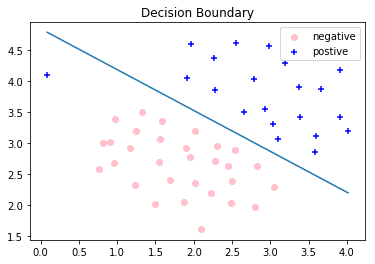

In [81]:
visualizeBoundaryLinear(data1_x, data1_y, test1)

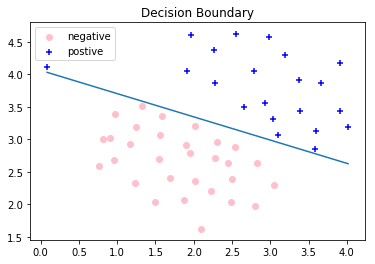

In [82]:
# test C=100
test100 = svmTrain(data1_x, data1_y, 100, 'linear')
visualizeBoundaryLinear(data1_x, data1_y, test100)

In [140]:
#testPred = test1.predict(data1_x)
#testPred

In [141]:
#data1_y.flatten()

In [142]:
#testPred == data1_y.flatten()

In [143]:
#test_accuracy = testPred == data1_y.flatten()
test_accuracy.sum() / len(test_accuracy) * 100

98.0392156862745

In [144]:
test_accuracy.mean()

0.9803921568627451

In [63]:
# Gaussian Kernels func
def gaussianKernel(x1, x2, sigma):
    sim = np.exp( - (np.linalg.norm(x1 - x2) ** 2) / (sigma ** 2) / 2 )
    return sim

In [66]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2
testSim = gaussianKernel(x1, x2, sigma)
testSim

0.32465246735834974

In [67]:
# plot dataset 2
data2_df = pd.DataFrame(np.concatenate((data2_x, data2_y), axis = 1))
data2_df.columns = ['x1', 'x2', 'y']
data2_df.head()

,x1,x2,y
0,0.107143,0.603070,1.0
1,0.093318,0.649854,1.0
2,0.097926,0.705409,1.0
3,0.155530,0.784357,1.0
4,0.210829,0.866228,1.0


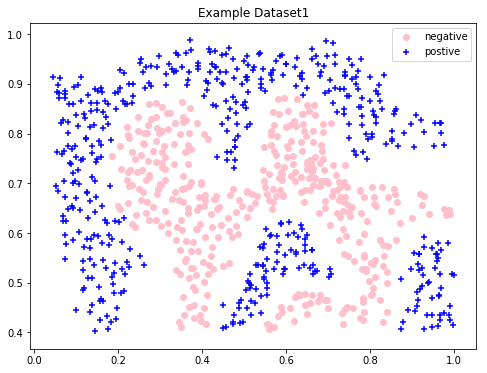

In [71]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
title = ax.set_title('Example Dataset1')
plot1 = ax.scatter(data2_df[data2_df.y == 0].x1, data2_df[data2_df.y == 0].x2, marker = 'o', c = 'pink',
                  label = 'negative')
plot2 = ax.scatter(data2_df[data2_df.y == 1].x1, data2_df[data2_df.y == 1].x2, marker = '+', c = 'blue',
                  label = 'postive')
ax.legend()
fig.canvas.draw()

In [173]:
def visualizeBoundary(x, y, model):
    x1 = np.linspace(x[:, 0].min(), x[:, 0].max(), 50)
    x2 = np.linspace(x[:, 1].min(), x[:, 1].max(), 50)
    xx1, xx2 = np.meshgrid(x1, x2)
    #print ('xx1', xx1.shape)
    
    z = model.predict(np.c_[xx1.ravel(), xx2.ravel()])
    z = z.reshape(xx1.shape)
    
    df = pd.concat((pd.DataFrame(x), pd.DataFrame(y)), axis=1)
    df.columns = ['x1', 'x2', 'y']
    
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(1, 1, 1)
    title = ax.set_title('Decision Boundary')
    #plot3 = ax.contourf(xx1, xx2, z, cmap=plt.cm.coolwarm, alpha=0.8)
    plot3 = ax.contour(xx1, xx2, z, colors='g', linewidths=0.5, linestyles='solid')
    plot1 = ax.scatter(df[df.y == 0].x1, df[df.y == 0].x2, marker = 'o', c = 'pink',
                  label = 'negative')
    plot2 = ax.scatter(df[df.y == 1].x1, df[df.y == 1].x2, marker = '+', c = 'blue',
                  label = 'postive')
    
    
    #ax.legend()
    fig.canvas.draw()
    

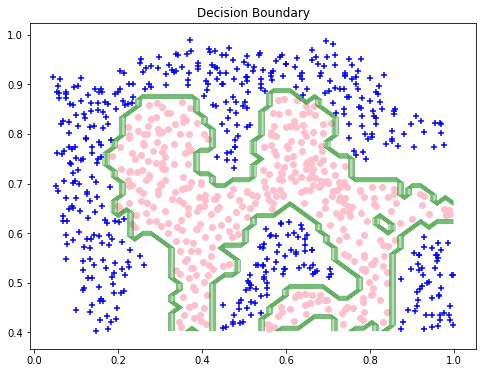

In [174]:
#test data2
kernel = 'gaussian'
test2 = svmTrain(data2_x, data2_y, 1, kernel)
visualizeBoundary(data2_x, data2_y, test2)

In [167]:
def dataset3Params(x, y, xval, yval):
    c_list = [.01, .03, .1, .3, 1, 3, 10, 30]
    sigma_list = [.01, .03, .1, .3, 1, 3, 10, 30]
    kernel = 'gaussian'
    
    error = np.zeros((len(c_list), len(sigma_list)))
    for i in range(len(c_list)):
        for j in range(len(sigma_list)):
            c = c_list[i]
            sigma = sigma_list[j]
            
            # train the model
            model = svmTrain(x, y, c, kernel, sigma)
            
            # pred using xval
            pred = model.predict(xval)
            
            # comp accuracy
            error[i, j] = (pred != yval.flatten()).mean()
            
            # find the index for min
            ind = error.argmin()
            opt_i = ind // error.shape[1]
            opt_j = ind % error.shape[1]
    
    c_opt = c_list[opt_i]
    sigma_opt = sigma_list[opt_j]
    return c_opt, sigma_opt

In [164]:
#test_mat = np.zeros((8, 8))
#test_mat[0, 7] = -1
#test_mat

In [165]:
#test_mat.argmin() // test_mat.shape[1]

In [166]:
#test_mat.argmin() % test_mat.shape[1]

In [170]:
testC, testSig = dataset3Params(data3_x, data3_y, data3_xval, data3_yval)
testC, testSig

(1, 0.1)

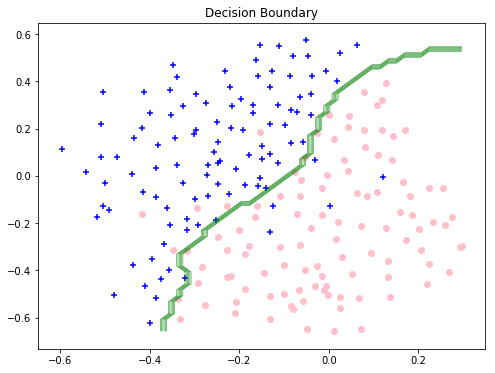

In [175]:
svm_opt_par = svmTrain(data3_x, data3_y, testC, 'gaussian', testSig)
visualizeBoundary(data3_x, data3_y, svm_opt_par)